In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2


In [3]:
df.tail()

,Дата,Склад,Контрагент,Номенклатура,Количество
301350,2018-08-31,5,address_173,product_15,0
301351,2018-08-31,5,address_173,product_17,1
301352,2018-08-31,5,address_173,product_18,1
301353,2018-08-31,5,address_173,product_19,0
301354,2018-08-31,5,address_173,product_20,2


In [4]:
sns.set_theme(style="whitegrid")

Проверяем формат столбцов

In [5]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [6]:
df["date"] = pd.to_datetime(df["Дата"])
df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество,date
0,2018-01-04,1,address_0,product_0,4,2018-01-04
1,2018-01-04,1,address_0,product_1,4,2018-01-04
2,2018-01-04,1,address_0,product_2,5,2018-01-04
3,2018-01-04,1,address_0,product_3,10,2018-01-04
4,2018-01-04,1,address_0,product_4,2,2018-01-04


In [7]:
df.dtypes

Дата                    object
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
date            datetime64[ns]
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby("date")["Количество"].sum()

Вывести несколько первых строк сгруппированных данных

In [9]:
grouped_df.head()

date
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64

Нарисуйте график продаж у `grouped_df`

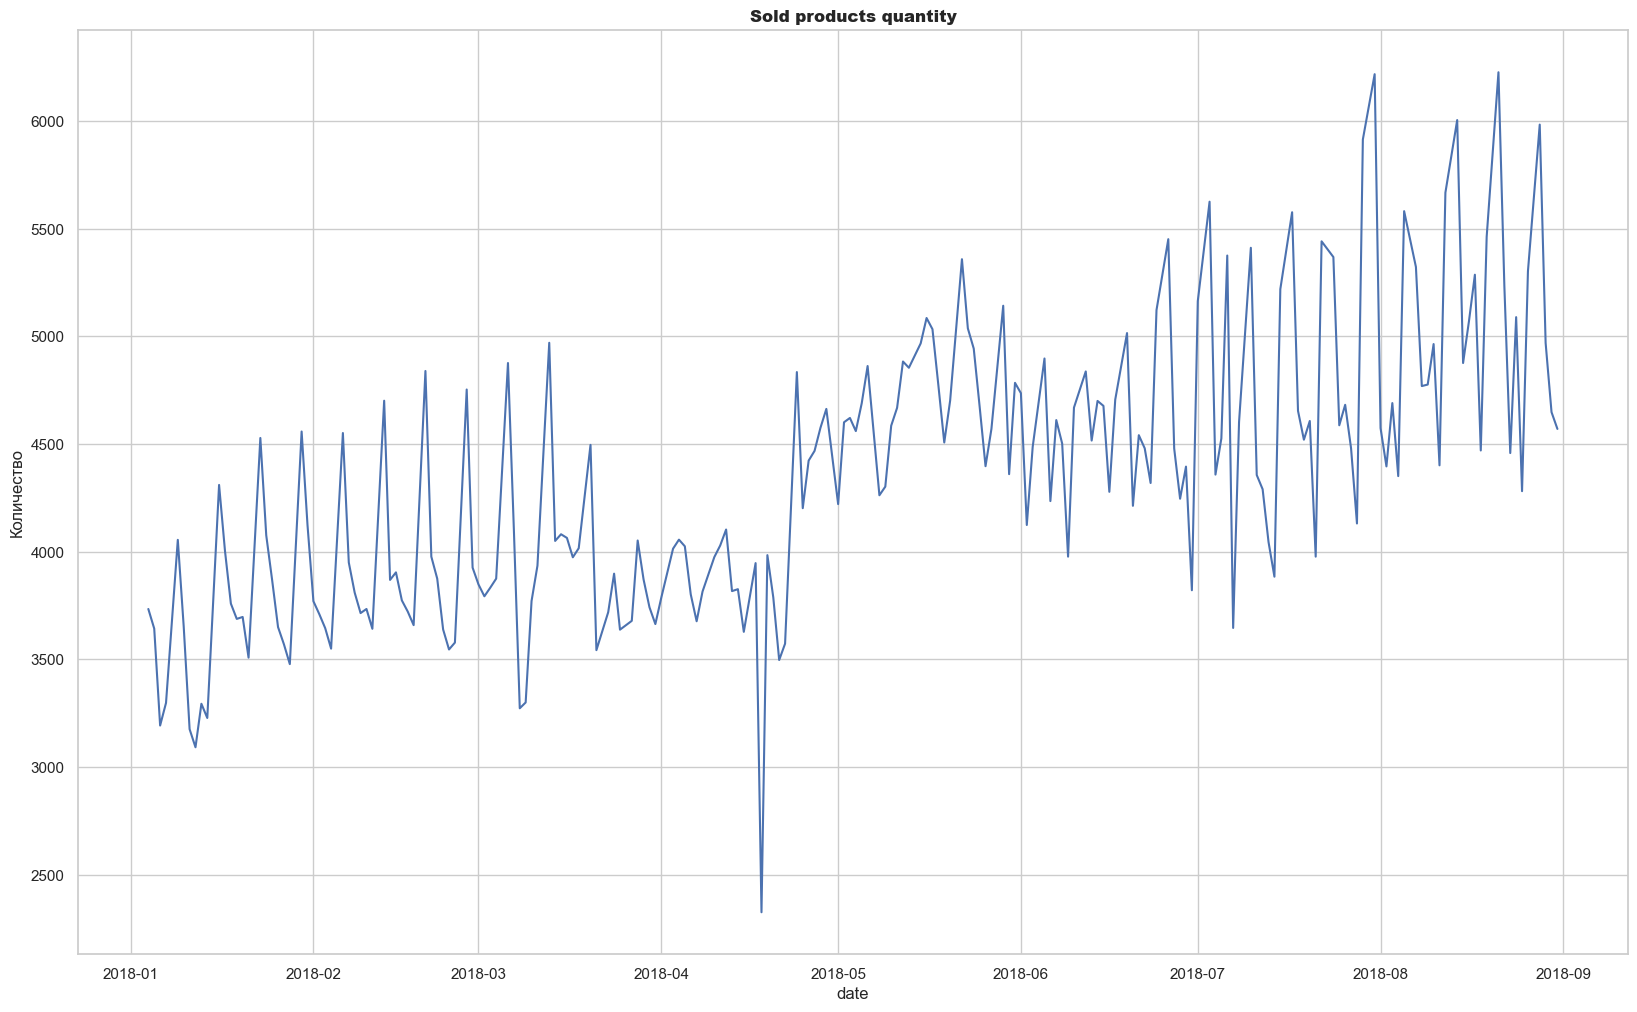

In [10]:
plt.figure(figsize=(20,12))
sns.lineplot(grouped_df)
plt.title("Sold products quantity", weight=800)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

*The graph is not consistent along the month, there are always fluctuations. Probably the peaks occur on weekend followed by the dip in sales during the weekdays. Moreover, fluctuations in summer became more significant and less pattern alike rather then in winter.*

*In the spring the chart illustrates the smallest sale values, while fall depicts the largest.*

*The overall trend of this chart is the increase in sales.*

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [11]:
Q1 = df["Количество"].quantile(0.25)
Q3 = df["Количество"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Количество"] < (Q1 - (1.5 * IQR))) | (df["Количество"] > (Q3 + (1.5 * IQR))) ]
outliers.head()

,Дата,Склад,Контрагент,Номенклатура,Количество,date
3,2018-01-04,1,address_0,product_3,10,2018-01-04
59,2018-01-04,1,address_3,product_6,10,2018-01-04
142,2018-01-04,1,address_10,product_2,10,2018-01-04
175,2018-01-04,1,address_14,product_1,9,2018-01-04
176,2018-01-04,1,address_14,product_2,10,2018-01-04


In [12]:
outliers.loc[outliers["Количество"].idxmax()]

Дата                     2018-06-28
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
date            2018-06-28 00:00:00
Name: 218822, dtype: object

In [13]:
df.loc[df["Количество"].idxmax()]

Дата                     2018-06-28
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
date            2018-06-28 00:00:00
Name: 218822, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [14]:
storage_3 = df[(df["Склад"] == 3) & (df["date"].between("2018-06", "2018-09")) & (df.date.dt.day_name() == "Wednesday")]
storage_3

,Дата,Склад,Контрагент,Номенклатура,Количество,date
191165,2018-06-06,3,address_206,product_0,2,2018-06-06
191166,2018-06-06,3,address_206,product_1,4,2018-06-06
191167,2018-06-06,3,address_206,product_2,4,2018-06-06
191168,2018-06-06,3,address_206,product_3,2,2018-06-06
191169,2018-06-06,3,address_206,product_4,1,2018-06-06
...,...,...,...,...,...,...
298028,2018-08-29,3,address_112,product_2,3,2018-08-29
298029,2018-08-29,3,address_112,product_3,3,2018-08-29
298030,2018-08-29,3,address_112,product_4,2,2018-08-29
298031,2018-08-29,3,address_112,product_5,1,2018-08-29


In [15]:
products_by_summer = storage_3.groupby(["Номенклатура"])["Количество"].sum().sort_values(ascending=False)
products_by_summer

Номенклатура
product_1     2267
product_2     2060
product_0     1324
product_3      914
product_6      650
product_4      540
product_22     509
product_5      480
product_13     253
product_15     230
product_17     148
product_11     131
product_10     129
product_12     129
product_18     126
product_19     123
product_8       94
product_7       94
product_21      80
product_20      78
product_23      68
product_14      64
product_16      26
Name: Количество, dtype: int64

In [16]:
top_product = products_by_summer.idxmax()
sold_amount = products_by_summer[top_product]
print(f"Top product is `{top_product}` which sales were: `{sold_amount}`")

Top product is `product_1` which sales were: `2267`


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [18]:
weather_df = pd.read_csv("./weather/weather.csv", skiprows=5, header=1, sep=";", index_col=False)[["Local time in Astana", "T"]]
weather_df.columns = ["date", "temp"]
weather_df["date"] = pd.to_datetime(weather_df["date"], dayfirst=True)
weather_df = weather_df.sort_values("date").reset_index()
weather_df.set_index('date', inplace=True)
weather_df = weather_df.resample('D').mean()
weather_df = weather_df[["temp"]]
weather_df

,temp
date,
2018-01-04,-14.0750
2018-01-05,-16.8625
2018-01-06,-13.3000
2018-01-07,-12.7500
2018-01-08,-15.4125
...,...
2018-12-27,-19.1000
2018-12-28,-13.2750
2018-12-29,-7.3250


In [21]:
combined_df = pd.merge(grouped_df, weather_df, left_index=True, right_index=True)
combined_df

,Количество,temp
date,,
2018-01-04,3734,-14.0750
2018-01-05,3643,-16.8625
2018-01-06,3193,-13.3000
2018-01-07,3298,-12.7500
2018-01-09,4055,-6.2500
...,...,...
2018-08-26,5302,11.9750
2018-08-28,5983,14.1125
2018-08-29,4969,13.8250


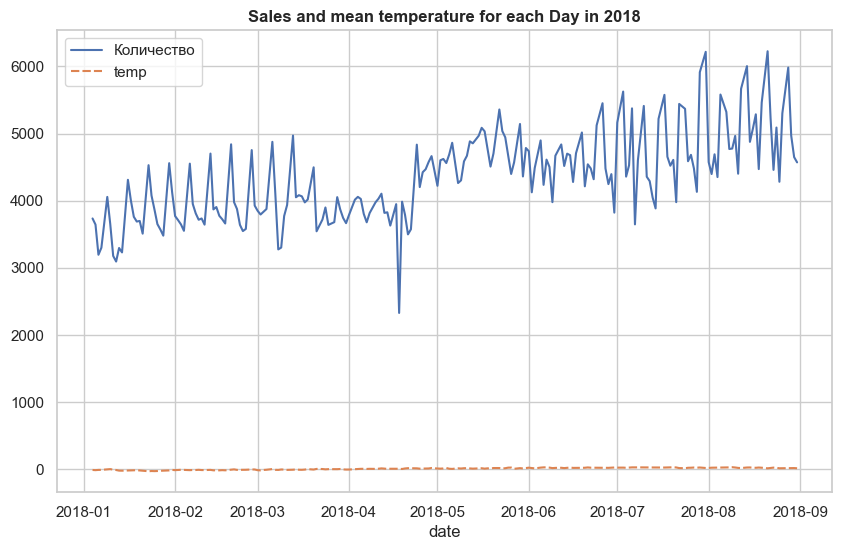

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(combined_df)
plt.title("Sales and mean temperature for each Day in 2018", weight=700)
plt.show()

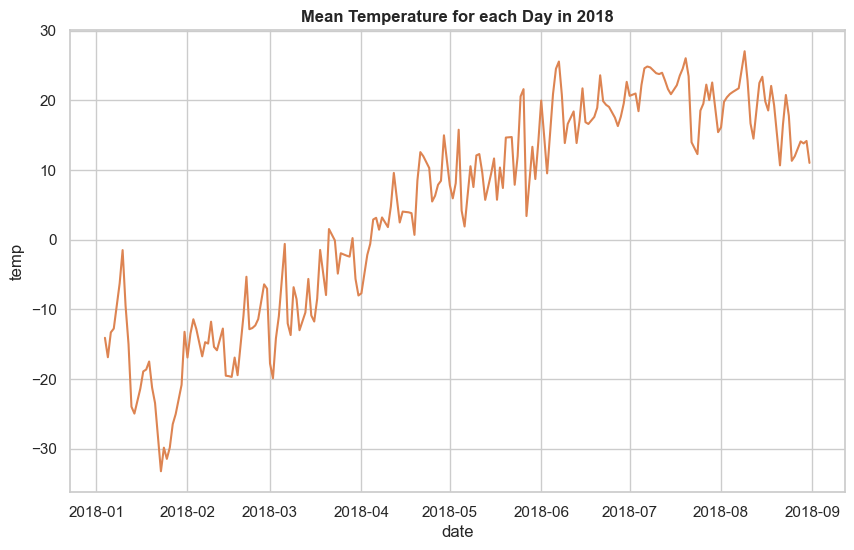

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(y=combined_df["temp"], x=combined_df.index, color=sns.color_palette()[1])
plt.title("Mean Temperature for each Day in 2018", weight=700)
plt.show()